In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Dados financeiros simulados (12 meses)

meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

np.random.seed(42)
receita = np.random.randint(500000, 900000, size=12)
despesa = np.random.randint(300000, 600000, size=12)
lucro = receita - despesa

df = pd.DataFrame({
    'Mês': meses,
    'Receita': receita,
    'Despesa': despesa,
    'Lucro': lucro
})



In [8]:


# 1. Cálculo da Margem de Lucro (%)
df['Margem_Lucro_%'] = (df['Lucro'] / df['Receita']) * 100

print("Análise de Margem de Lucro")
print(df[['Mês', 'Receita', 'Despesa', 'Lucro', 'Margem_Lucro_%']])

print("\nMédia da Margem de Lucro: {:.2f}%".format(df['Margem_Lucro_%'].mean()))
print("Margem Mínima: {:.2f}%".format(df['Margem_Lucro_%'].min()))
print("Margem Máxima: {:.2f}%".format(df['Margem_Lucro_%'].max()))



Análise de Margem de Lucro
    Mês  Receita  Despesa   Lucro  Margem_Lucro_%
0   Jan   621958   475203  146755       23.595645
1   Feb   646867   491335  155532       24.043892
2   Mar   631932   578167   53765        8.508036
3   Apr   865838   341090  524748       60.605795
4   May   759178   364820  394358       51.945394
5   Jun   619879   562913   56966        9.189858
6   Jul   610268   494027  116241       19.047533
7   Aug   707892   552709  155183       21.921847
8   Sep   554886   499041   55845       10.064229
9   Oct   637337   567455   69882       10.964686
10  Nov   587498   403355  184143       31.343596
11  Dec   874871   535796  339075       38.757142

Média da Margem de Lucro: 25.83%
Margem Mínima: 8.51%
Margem Máxima: 60.61%


In [9]:
# 2. Simulação de Cenários
print("\n Simulação de Cenários:")

# Cenário 1: Aumento da Receita em 10%
receita_aumentada = receita * 1.10
lucro_aumentado = receita_aumentada - despesa

print("\n Cenário 1: Aumento de Receita em 10%")
print(f"Lucro Médio sobe de {np.mean(lucro):,.0f} para {np.mean(lucro_aumentado):,.0f}")

# Cenário 2: Aumento dos Custos em 15%
despesa_aumentada = despesa * 1.15
lucro_reduzido = receita - despesa_aumentada

print("\n Cenário 2: Aumento de Custos em 15%")
print(f"Lucro Médio cai de {np.mean(lucro):,.0f} para {np.mean(lucro_reduzido):,.0f}")



 Simulação de Cenários:

 Cenário 1: Aumento de Receita em 10%
Lucro Médio sobe de 187,708 para 255,361

 Cenário 2: Aumento de Custos em 15%
Lucro Médio cai de 187,708 para 114,384


In [10]:

# 3. Projeção de Fluxo de Caixa (6 meses)
print("\n Projeção de Fluxo de Caixa para os próximos 6 meses:")

receita_atual = np.mean(receita)
despesa_atual = np.mean(despesa)

projecao = []
for i in range(1, 7):
    receita_proj = receita_atual * (1 + 0.05) ** i
    despesa_proj = despesa_atual * (1 + 0.02) ** i
    lucro_proj = receita_proj - despesa_proj
    projecao.append([f'M+{i}', receita_proj, despesa_proj, lucro_proj])

df_projecao = pd.DataFrame(projecao, columns=['Mês', 'Receita', 'Despesa', 'Lucro'])

print(df_projecao)


 Projeção de Fluxo de Caixa para os próximos 6 meses:
   Mês        Receita        Despesa          Lucro
0  M+1  710360.350000  498602.435000  211757.915000
1  M+2  745878.367500  508574.483700  237303.883800
2  M+3  783172.285875  518745.973374  264426.312501
3  M+4  822330.900169  529120.892841  293210.007327
4  M+5  863447.445177  539703.310698  323744.134479
5  M+6  906619.817436  550497.376912  356122.440524


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


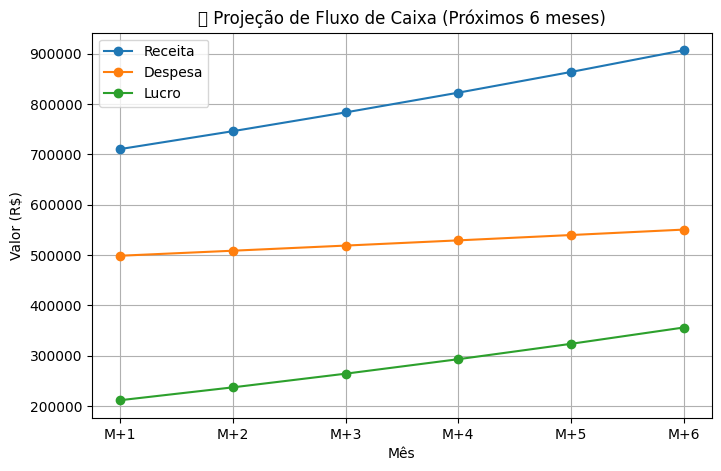

In [11]:

# 4. Gráfico da Projeção de Lucro
plt.figure(figsize=(8,5))
plt.plot(df_projecao['Mês'], df_projecao['Receita'], label='Receita', marker='o')
plt.plot(df_projecao['Mês'], df_projecao['Despesa'], label='Despesa', marker='o')
plt.plot(df_projecao['Mês'], df_projecao['Lucro'], label='Lucro', marker='o')
plt.title('📈 Projeção de Fluxo de Caixa (Próximos 6 meses)')
plt.xlabel('Mês')
plt.ylabel('Valor (R$)')
plt.legend()
plt.grid(True)
plt.show()
